In [1]:
# Delivery Time Prediction
# Brazilian E-Commerce Public Dataset by Olist

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the datasets
orders = pd.read_csv(r"C:\Users\NIC\Desktop\Deliver-Time-Analysis-Prediction\olist_orders_dataset.csv")
order_items = pd.read_csv(r"C:\Users\NIC\Desktop\Deliver-Time-Analysis-Prediction\olist_order_items_dataset.csv")
customers = pd.read_csv(r"C:\Users\NIC\Desktop\Deliver-Time-Analysis-Prediction\olist_customers_dataset.csv")
products = pd.read_csv(r"C:\Users\NIC\Desktop\Deliver-Time-Analysis-Prediction\olist_products_dataset.csv")
order_reviews = pd.read_csv(r"C:\Users\NIC\Desktop\Deliver-Time-Analysis-Prediction\olist_order_reviews_dataset.csv")
sellers = pd.read_csv(r"C:\Users\NIC\Desktop\Deliver-Time-Analysis-Prediction\olist_sellers_dataset.csv")

In [3]:
# level 1: Understanding the data 
# Check records & columns
# shape & info 
datasets = {
    "orders": orders,
    "order_items": order_items,
    "customers": customers,
    "products": products,
    "order_reviews": order_reviews,
    "sellers": sellers
}

for name, df in datasets.items():
    print(f"\n{name.upper()}")
    display(df.shape)
    display(df.head())
    display(df.info())


ORDERS


(99441, 8)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


ORDER_ITEMS


(112650, 7)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


CUSTOMERS


(99441, 5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


PRODUCTS


(32951, 9)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


ORDER_REVIEWS


(99224, 7)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None


SELLERS


(3095, 4)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

In [4]:
# Basis Statistics
# Descriptive Stats
order_items[['price', 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [5]:
# Missing & duplicates values
# Data Quality Check
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
orders.duplicated().sum()

np.int64(0)

In [7]:
# Level 2: Data Cleaning & Feature Creation
# Remove invalid orders
orders = orders.dropna(subset=[
    'order_purchase_timestamp', 
    'order_delivered_customer_date'
])
orders = orders.drop_duplicates(subset='order_id')

In [8]:
# Convert timestamps
# Datetime Conversion
time_cols = [
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in time_cols:
    orders[col] = pd.to_datetime(orders[col])

In [9]:
# Create target variable (delivery time)
# Delivery Duration (Target)
orders['delivery_time_days'] = (
    orders['order_delivered_customer_date']-orders['order_purchase_timestamp']
).dt.days

In [10]:
# Remove invalid delivery times
orders = orders[orders['delivery_time_days'] >= 0]

In [11]:
# Feature Engineering
# Merge Datasets
df = orders.merge(order_items, on='order_id', how='left') \
           .merge(customers, on='customer_id', how='left') \
           .merge(products, on='product_id', how='left') \
           .merge(sellers, on='seller_id', how='left') \
           .merge(order_reviews[['order_id', 'review_score']], on='order_id', how='left')

In [12]:
# Time-Based Features
df['purchase_weekday'] = df['order_purchase_timestamp'].dt.weekday
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour

df['delivery_delay'] = (
    df['order_delivered_customer_date']
    - df['order_estimated_delivery_date']
).dt.days

# df['is_late'] = df['delivery_delay'].apply(lambda x: 1 if x > 0 else 0)
df['is_late'] = (df['delivery_delay'] > 0).astype(int)

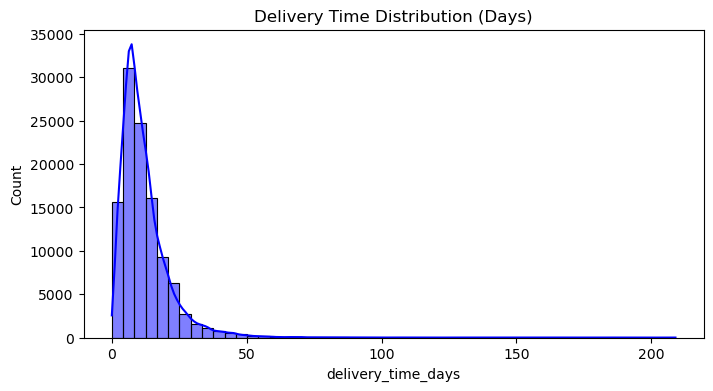

In [13]:
# Feature Analysis with visualization
# Delivery time distribution
plt.figure(figsize=(8,4))
sns.histplot(df['delivery_time_days'], bins=50, kde=True, color='blue')
plt.title("Delivery Time Distribution (Days)")
plt.show()

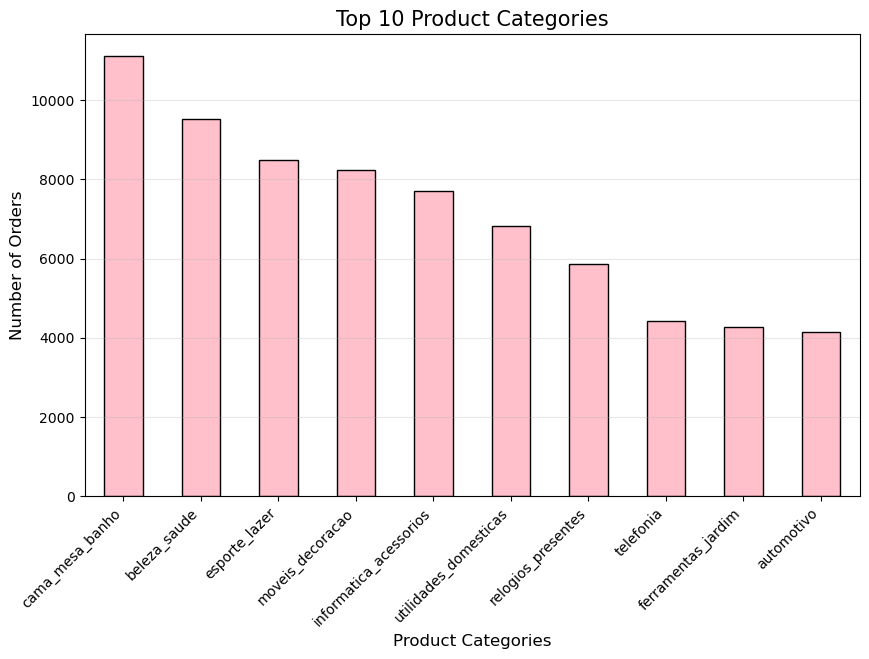

In [14]:
# Orders per Product Category
product_cat= df['product_category_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
product_cat.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Top 10 Product Categories", fontsize=15)
plt.xlabel("Product Categories", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

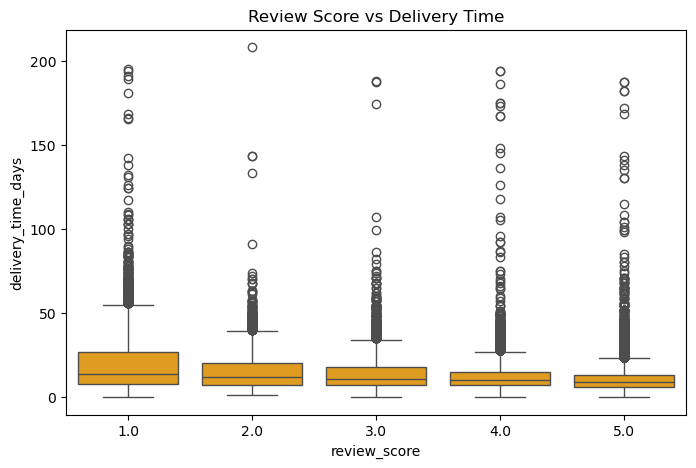

In [15]:
# Review Score vs Delivery Time
plt.figure(figsize=(8,5))
sns.boxplot(x='review_score', y='delivery_time_days', data=df, color='orange')
plt.title("Review Score vs Delivery Time")
plt.show()

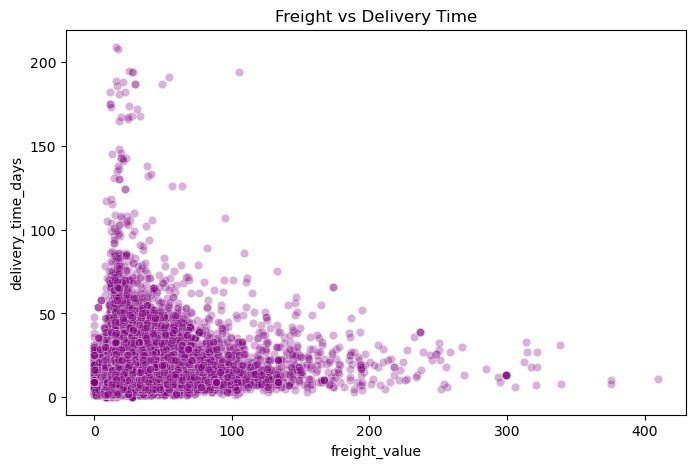

In [16]:
# Freight vs Delivery Time
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='freight_value', 
    y='delivery_time_days',
    data=df, alpha=0.3, color='purple'
)
plt.title("Freight vs Delivery Time")
plt.show()

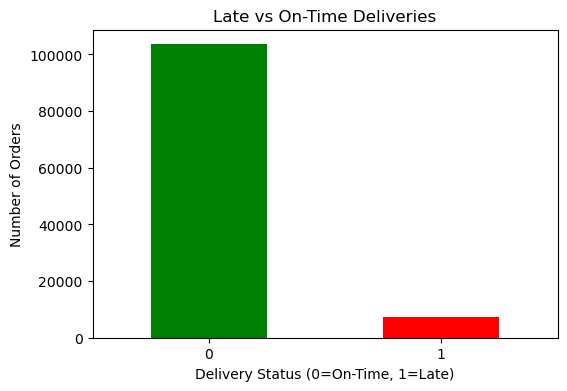

In [17]:
# Late vs On-Time
plt.figure(figsize=(6,4))
df['is_late'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Late vs On-Time Deliveries")
plt.xlabel("Delivery Status (0=On-Time, 1=Late)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.show()

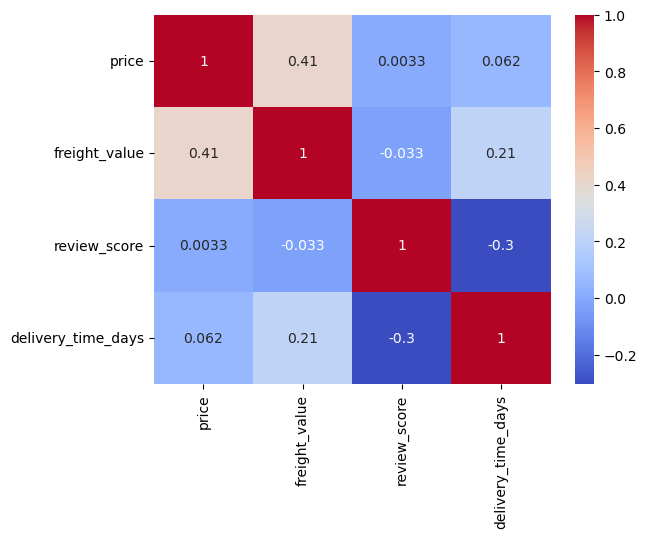

In [18]:
# Correlation Analysis
corr_f = df[['price', 'freight_value', 'review_score', 'delivery_time_days']]
sns.heatmap(corr_f.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
# Pivot Table
# Average delivery time per seller state
avg_delivery_time= pd.pivot_table(
    df,
    values='delivery_time_days',
    index='seller_state',
    aggfunc='mean'
).sort_values(by='delivery_time_days', ascending=False)

# Count of sellers per state
avg_delivery_time['seller_count'] = df['seller_state'].value_counts()
print(avg_delivery_time)

              delivery_time_days  seller_count
seller_state                                  
AM                     47.333333             3
CE                     17.433333            90
MA                     17.277916           403
RO                     16.928571            14
MT                     14.256944           144
BA                     13.388179           626
PI                     13.272727            11
PA                     13.125000             8
SC                     13.091181          4014
PR                     12.934135          8563
RN                     12.642857            56
PE                     12.496629           445
ES                     12.417582           364
GO                     12.385069           509
MG                     12.339540          8647
SE                     12.200000            10
PB                     12.162162            37
DF                     12.091525           885
MS                     11.900000            50
SP           

In [20]:
# Model Training & Evaluation
# Train-Test Split
features = ['price', 'freight_value', 'review_score', 'purchase_weekday']
df_model = df[features + ['delivery_time_days']].dropna()

X = df_model[features]
y = df_model['delivery_time_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Model train and evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}
results = {
    name: {
        "MAE": mean_absolute_error(y_test, model.fit(X_train, y_train).predict(X_test)),
        "MSE": mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test)),
        "RMSE": np.sqrt(mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test))),
        "R2_SCORE": r2_score(y_test, model.fit(X_train, y_train).predict(X_test))
    }
    for name, model in models.items()
}
# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results).T  # transpose so models are rows
results_df = results_df.round(2)       # round metrics to 2 decimals
results_df.index.name = "Model"        # name the index

# Display the DataFrame
print(results_df)

                    MAE     MSE   RMSE  R2_SCORE
Model                                           
Linear Regression  5.86   74.72   8.64      0.14
Decision Tree      5.94  107.35  10.36     -0.24
Random Forest      4.97   64.29   8.02      0.26


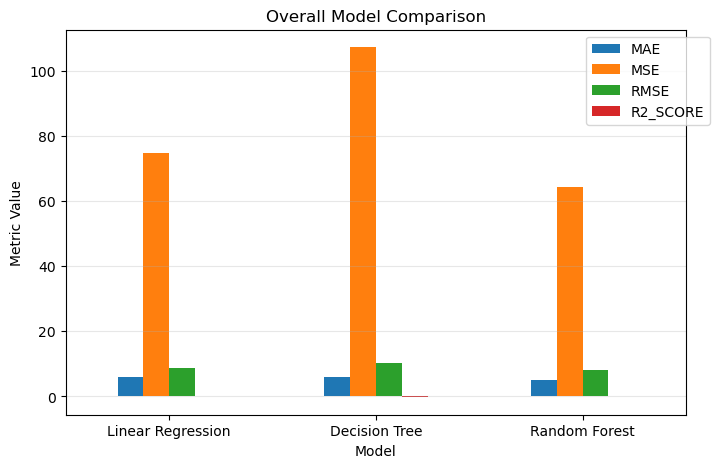

In [22]:
# Overall Model Comparison
results_df.plot(kind='bar', figsize=(8,5))
plt.title("Overall Model Comparison")
plt.ylabel("Metric Value")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.show()

   Actual_Delivery_Time  Predicted_Delivery_Time
0                     9                13.793333
1                    14                12.400000
2                     7                 7.475000
3                     6                 6.000000
4                     4                 3.409500


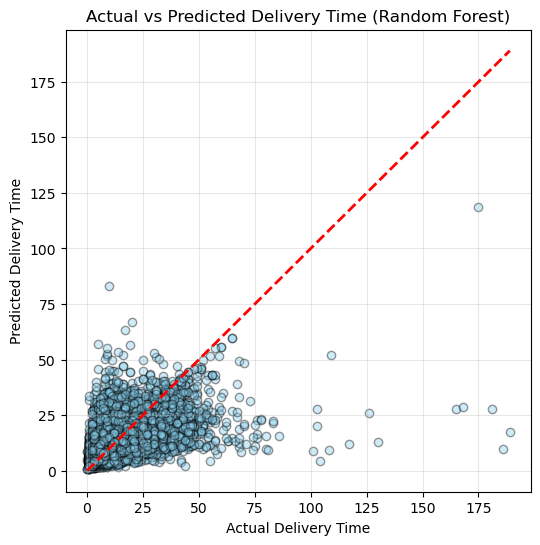

In [23]:
# Actual vs Predicted of best model
rf_model = models["Random Forest"]
y_pred = rf_model.fit(X_train, y_train).predict(X_test)

actual_vs_pred = pd.DataFrame({
    "Actual_Delivery_Time": y_test.values,
    "Predicted_Delivery_Time": y_pred
})

print(actual_vs_pred.head())

# Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='skyblue', edgecolor='black')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', linestyle='--', linewidth=2
)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time (Random Forest)")
plt.grid(alpha=0.3)
plt.show()

In [24]:
# Example: Predicting Delivery Time for a New Order
new_orders = pd.DataFrame({
    'price': [150.0],
    'freight_value': [20.0],
    'review_score': [5],
    'purchase_weekday': [2]
})

# use the trained Random Forest model to predict
predicted_delivery_time = rf_model.predict(new_orders)
print(f"Predicted Delivery Time (in days): {predicted_delivery_time[0]:.2f}")

Predicted Delivery Time (in days): 11.80
